In [153]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

alpha=0.4
np.random.seed(1)

In [154]:
cov0 = np.matrix([[1,0],[0,1]]) # diagonal covariance, points lie on x or y-axis
mean0 = [0,0]
N=100
x=np.zeros((N+1,2))
theta=[np.random.multivariate_normal(mean0,3*cov0,1)] # $\times 3$ to spread out thetas
x[0,]=np.random.multivariate_normal(theta[0][0],0.1*cov0,1)
table_picked=np.zeros((N+1,1))
table_picked[0]=1

In [155]:
n_k=[1.0]
for i in range(N):
    norm_const=(alpha+i+1.);
    p_new_table=alpha/norm_const #note that it should be alpha+n-1 but due to python indexing...
    p_existing_table=np.array(n_k)/norm_const
    p=np.append(p_existing_table, p_new_table)
    table=np.random.multinomial(1,p,1)
    table_id=np.flatnonzero(table)[0]
    if np.nonzero(table)[1]==(len(table[0])-1): #if new table chosen
        n_k.append(1.0) #add new table
        theta.append(np.random.multivariate_normal(mean0,cov0,1)) #choose new dish
    else:
        n_k[table_id]=n_k[table_id]+1.0
    x[i+1,]=np.random.multivariate_normal(theta[table_id][0],0.1*cov0,1) #choose x
    table_picked[i+1]=table_id
        

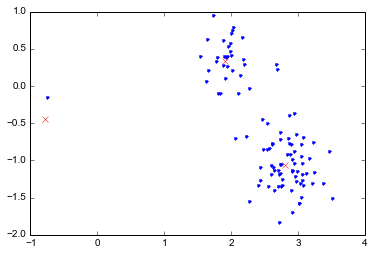

In [156]:
plt.figure()
plt.plot(x[:,0],x[:,1],'.')
for i in range(len(theta)):
    plt.plot(theta[i][0][0],theta[i][0][1],'rx')
plt.show()

In [157]:
theta

[array([[ 2.8134487 , -1.05959319]]),
 array([[ 1.91382039,  0.33079713]]),
 array([[-0.78191168, -0.43750898]])]